# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

In [41]:
import pandas as pd

# Getting our week2 numeric data

In [42]:
df = pd.read_csv('~/Documents/MSDS_VaishaliWork/MSDS600_DataScience/Week2/Assignment2/updated_churn_data.csv')
df

,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,29.85,29.85,0
1,1,34,1,1,1,56.95,1889.50,0
2,2,2,1,0,1,53.85,108.15,1
3,3,45,0,1,2,42.30,1840.75,0
4,4,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7027,7038,24,1,1,1,84.80,1990.50,0
7028,7039,72,1,1,3,103.20,7362.90,0
7029,7040,11,0,0,0,29.60,346.45,0
7030,7041,4,1,0,1,74.40,306.60,1


In [43]:
# We got an extra unnamed column so removing it from the data frame.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Pycaret to find ML algorithm

Have created a virtua environment in terminal and using the kernel "pycaret" here. importing a package to compare, predict and load the models.

In [44]:
from pycaret.classification import ClassificationExperiment

# creating an object as automl

In [45]:
automl = ClassificationExperiment()

In [46]:
automl.setup(df, target='Churn')

,Description,Value
0,Session id,8446
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7032, 7)"
4,Transformed data shape,"(7032, 7)"
5,Transformed train set shape,"(4922, 7)"
6,Transformed test set shape,"(2110, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


Total rows in original/transformed data is 7032. Training data count is 4922 and test data is 2110.

In [47]:
automl

# running automl to find the best model.

First we fetch the best model based on default parameter accuracy

In [57]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7928,0.8344,0.5023,0.6403,0.5628,0.4296,0.4352,0.0270
lr,Logistic Regression,0.7913,0.8340,0.5138,0.6326,0.5668,0.4314,0.4356,0.0140
gbc,Gradient Boosting Classifier,0.7895,0.8337,0.4978,0.6319,0.5563,0.4211,0.4265,0.0740
lda,Linear Discriminant Analysis,0.7893,0.8227,0.4954,0.6329,0.5553,0.4200,0.4257,0.0040
ridge,Ridge Classifier,0.7887,0.0000,0.4389,0.6537,0.5243,0.3953,0.4087,0.0040
lightgbm,Light Gradient Boosting Machine,0.7775,0.8223,0.4924,0.5994,0.5404,0.3955,0.3990,0.0140
xgboost,Extreme Gradient Boosting,0.7751,0.8085,0.4962,0.5916,0.5390,0.3920,0.3950,0.0490
rf,Random Forest Classifier,0.7704,0.7972,0.4741,0.5841,0.5225,0.3738,0.3778,0.0700
knn,K Neighbors Classifier,0.7615,0.7450,0.4373,0.5655,0.4925,0.3403,0.3453,0.0080
et,Extra Trees Classifier,0.7562,0.7720,0.4794,0.5483,0.5110,0.3497,0.3514,0.0550


# printing the best model based on accuracy

In [58]:
best_model

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=8446)

# Best model using AUC parameter

In [51]:
best_model_AUC = automl.compare_models(sort = "AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.7928,0.8344,0.5023,0.6403,0.5628,0.4296,0.4352,0.0260
lr,Logistic Regression,0.7913,0.8340,0.5138,0.6326,0.5668,0.4314,0.4356,0.0130
gbc,Gradient Boosting Classifier,0.7895,0.8337,0.4978,0.6319,0.5563,0.4211,0.4265,0.0740
qda,Quadratic Discriminant Analysis,0.7515,0.8231,0.7492,0.5238,0.6160,0.4410,0.4569,0.0040
lda,Linear Discriminant Analysis,0.7893,0.8227,0.4954,0.6329,0.5553,0.4200,0.4257,0.0040
lightgbm,Light Gradient Boosting Machine,0.7775,0.8223,0.4924,0.5994,0.5404,0.3955,0.3990,0.0130
xgboost,Extreme Gradient Boosting,0.7751,0.8085,0.4962,0.5916,0.5390,0.3920,0.3950,0.0500
nb,Naive Bayes,0.7137,0.8057,0.7691,0.4767,0.5883,0.3871,0.4134,0.0040
rf,Random Forest Classifier,0.7704,0.7972,0.4741,0.5841,0.5225,0.3738,0.3778,0.0790
et,Extra Trees Classifier,0.7562,0.7720,0.4794,0.5483,0.5110,0.3497,0.3514,0.0630


In [52]:
best_model_AUC
# Logisticregression is the best model when compared using AUC parameter.

AdaBoostClassifier(algorithm='SAMME.R', base_estimator='deprecated',
                   estimator=None, learning_rate=1.0, n_estimators=50,
                   random_state=8446)

# Best model using precision

In [53]:
best_model_prec = automl.compare_models(sort = "Prec.")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.7887,0.0000,0.4389,0.6537,0.5243,0.3953,0.4087,0.0040
ada,Ada Boost Classifier,0.7928,0.8344,0.5023,0.6403,0.5628,0.4296,0.4352,0.0270
lda,Linear Discriminant Analysis,0.7893,0.8227,0.4954,0.6329,0.5553,0.4200,0.4257,0.0040
lr,Logistic Regression,0.7913,0.8340,0.5138,0.6326,0.5668,0.4314,0.4356,0.0090
gbc,Gradient Boosting Classifier,0.7895,0.8337,0.4978,0.6319,0.5563,0.4211,0.4265,0.0740
lightgbm,Light Gradient Boosting Machine,0.7775,0.8223,0.4924,0.5994,0.5404,0.3955,0.3990,0.0130
xgboost,Extreme Gradient Boosting,0.7751,0.8085,0.4962,0.5916,0.5390,0.3920,0.3950,0.0500
rf,Random Forest Classifier,0.7704,0.7972,0.4741,0.5841,0.5225,0.3738,0.3778,0.0720
knn,K Neighbors Classifier,0.7615,0.7450,0.4373,0.5655,0.4925,0.3403,0.3453,0.0070
et,Extra Trees Classifier,0.7562,0.7720,0.4794,0.5483,0.5110,0.3497,0.3514,0.0560


In [54]:
best_model_prec

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=8446, solver='auto',
                tol=0.0001)

# Best model using Recall parameter

In [55]:
best_model_recall = automl.compare_models(sort = "Recall")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.7137,0.8057,0.7691,0.4767,0.5883,0.3871,0.4134,0.0040
qda,Quadratic Discriminant Analysis,0.7515,0.8231,0.7492,0.5238,0.6160,0.4410,0.4569,0.0040
svm,SVM - Linear Kernel,0.6833,0.0000,0.5312,0.5470,0.4523,0.2684,0.3140,0.0070
lr,Logistic Regression,0.7913,0.8340,0.5138,0.6326,0.5668,0.4314,0.4356,0.0130
ada,Ada Boost Classifier,0.7928,0.8344,0.5023,0.6403,0.5628,0.4296,0.4352,0.0270
gbc,Gradient Boosting Classifier,0.7895,0.8337,0.4978,0.6319,0.5563,0.4211,0.4265,0.0740
xgboost,Extreme Gradient Boosting,0.7751,0.8085,0.4962,0.5916,0.5390,0.3920,0.3950,0.0500
lda,Linear Discriminant Analysis,0.7893,0.8227,0.4954,0.6329,0.5553,0.4200,0.4257,0.0040
lightgbm,Light Gradient Boosting Machine,0.7775,0.8223,0.4924,0.5994,0.5404,0.3955,0.3990,0.0140
dt,Decision Tree Classifier,0.7174,0.6485,0.4802,0.4688,0.4735,0.2807,0.2813,0.0060


In [56]:
best_model_recall

GaussianNB(priors=None, var_smoothing=1e-09)

We tried to check best models using automl based on various parameters. Observation is AdaBoostClassifier is the best model based on accuracy and AUC. RidgeClassifier is the best one when compared with precision. GaussianNB is the best model as per recall using automated ML.

# Plotting various information about best model (based on AUC)

In [59]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

On plotting the feature importance grapg we found that Total charges is the best feature for predicting churn followed by monthly charges. Payment method is the least impacting feature for churn.

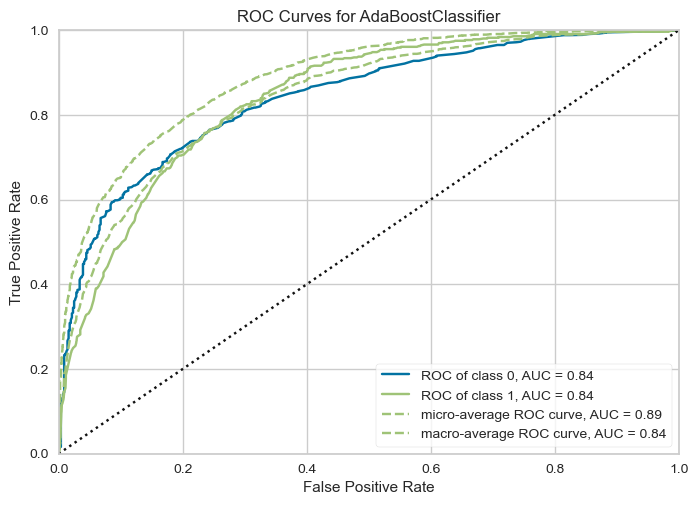

In [60]:
# Plotting the best model based on accuracy to check the true and false positive rates.
automl.plot_model(best_model)

# Confusion matrix using pycaret

Plotting a confusion matrix using auto ml.

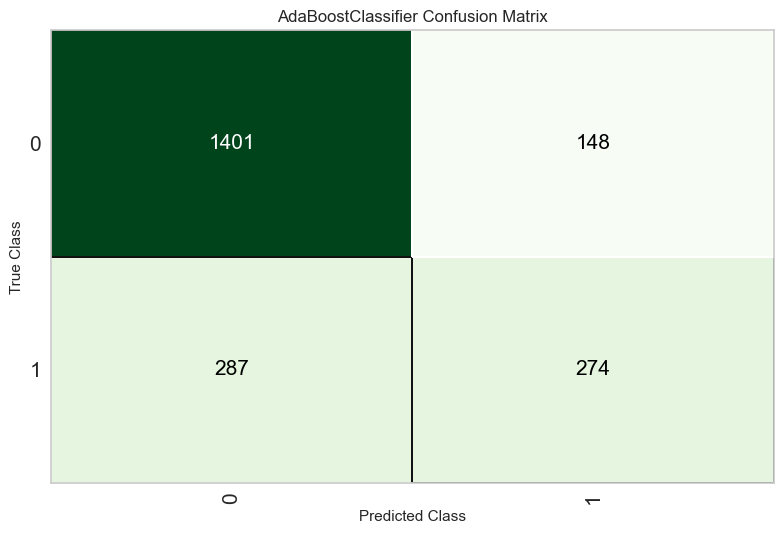

In [61]:
cm = automl.plot_model(best_model, plot = 'confusion_matrix')

In [40]:
# true positive - 1401
# true negative - 287
# False Positive - 148
# False negative - 274

# Making predictions using various parameters - optional section

In [62]:
df.iloc[-2:-1].shape

(1, 7)

In [63]:
automl.predict_model(best_model, df.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
7030,4,1,0,1,74.400002,306.600006,1,1,0.5025


In [64]:
predictions = automl.predict_model(best_model, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7966,0.8477,0.5019,0.6527,0.5675,0.4375,0.4439


In [65]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,1,0,0,0,29.850000,29.850000,0,1,0.5061
1,34,1,1,1,56.950001,1889.500000,0,0,0.5163
2,2,1,0,1,53.849998,108.150002,1,0,0.5028
3,45,0,1,2,42.299999,1840.750000,0,0,0.5139
4,2,1,0,0,70.699997,151.649994,1,1,0.5046


# Prediction using AUC parameter

In [66]:
predictions_AUC = automl.predict_model(best_model_AUC, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ada Boost Classifier,0.7966,0.8477,0.5019,0.6527,0.5675,0.4375,0.4439


In [67]:
predictions_AUC.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
0,1,0,0,0,29.850000,29.850000,0,1,0.5061
1,34,1,1,1,56.950001,1889.500000,0,0,0.5163
2,2,1,0,1,53.849998,108.150002,1,0,0.5028
3,45,0,1,2,42.299999,1840.750000,0,0,0.5139
4,2,1,0,0,70.699997,151.649994,1,1,0.5046


# Prediction using Precision

In [68]:
predictions_prec = automl.predict_model(best_model_prec, data=df)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Ridge Classifier,0.7917,0.6804,0.4430,0.6613,0.5306,0.4034,0.4167


In [69]:
predictions_prec.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label
0,1,0,0,0,29.850000,29.850000,0,0
1,34,1,1,1,56.950001,1889.500000,0,0
2,2,1,0,1,53.849998,108.150002,1,0
3,45,0,1,2,42.299999,1840.750000,0,0
4,2,1,0,0,70.699997,151.649994,1,1


Analysed the prediction score with different best models based on accuracy, AUC, precision and recall. Few records are displayed for each model.

# Loading and saving the best model (based on accuracy)

In [27]:
automl.save_model(best_model, 'pycaret_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean',
                                                               verbose='deprecated'))),
                 ('...
                                        

The pickle file is created in the same directory with name as "pycaret_model.pkl" in the binary mode.

In [28]:
new_pycaret = ClassificationExperiment()

In [29]:
loaded_model = new_pycaret.load_model('pycaret_model')

Transformation Pipeline and Model Successfully Loaded


In [30]:
new_data = df.iloc[-2:-1].copy()
new_data.drop('Churn', axis=1, inplace=True)
new_pycaret.predict_model(loaded_model,new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,prediction_label,prediction_score
7030,4,1,0,1,74.400002,306.600006,1,0.5815


# Python code with new churn data to predict churn

This is already a numeric data so no pre processing is required.

In [31]:
from IPython.display import Code


In [32]:
Code(filename = 'predict_churn.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churndata into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col= 'customerID')
    return df


def make_predictions(df):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=df)
    #predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    #predictions['Churn_prediction'].replace({1: 'Churn', 0: 'No churn'},inplace=True)
    return predictions#['Churn_prediction']


if __name__ == "__main__":
    df = load_data('~/Documents/MSDS_VaishaliWork/MSDS600_DataScience/Week5/Assignment/new_churn_data.csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

# Executing the python code

In [33]:
%run predict_churn.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
customerID                                                                  
9305-CKSKC      22             1         0              2       97.400002   
1452-KNGVK       8             0         1              1       77.300003   
6723-OKKJM      28             1         0              0       28.250000   
7832-POPKP      62             1         0              2      101.699997   
6348-TACGU      10             0         0              1       51.150002   

            TotalCharges  charge_per_tenure  prediction_label  \
customerID                                                      
9305-CKSKC    811.700012          36.895454                 0   
1452-KNGVK   1701.949951         212.743744                 1   
6723-OKKJM    250.899994           8.960714                 0   
7832-POPKP   3106.560059          50.105808                 0   
634

<Figure size 800x550 with 0 Axes>

# Summary

We explored various auto Machine learning algorithms using pycaret and tried to figure out the best model for out data set using different parameters.We are using the week 2 numeric data for this.
First we created the virtual environment named "pycaret" to run python 3.10 (compatible version for pycaret) and switched the kernel for same.
automl is the object created for pycaret ClassificationExperiment and target is "Churn". Total rows in original/transformed data is 7032. Training data count is 4922 and test data is 2110. Further we run autumn to get the best model using default parameter, accuracy.
Also explored other parameters like AUC, precision and recall. Observation is AdaBoostClassifier is the best model based on accuracy and AUC. RidgeClassifier is the best one when compared with precision. GaussianNB is the best model as per recall using automated ML.
On plotting the feature importance graph we found that Total charges is the best feature for predicting churn followed by monthly charges. Payment method is the least impacting feature for churn. Also plotted the confusion matrix to check on the count for true/false positive and negative records.

Analysed the prediction score with different best models based on accuracy, AUC, precision and recall. Few records are displayed for each model.
We also saved the best model as pickle file named “pycaret_model.pkl” in the local directory.
Executed the python code to check predictions on churn data using the same model. This is done using new churn data. The .py file is also attached. With this code the prediction_score achieved is near to 0.9 which is good.

Finally the files for this week are saved in GitHub repository link “https://github.com/vaishaliM01/MSDS600_week5”

# H20 Auto ML - Optional
Exploring H2o auto ml to predict the best model.

In [42]:
conda install -c conda-forge h2o-py -y

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
- DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
/ DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm

In [72]:
import h2o
from h2o.automl import H2OAutoML

In [73]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,8 days 18 hours 2 mins
H2O_cluster_timezone:,America/Denver
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,1 month and 1 day
H2O_cluster_name:,H2O_from_python_puneet_d7ukjr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.609 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [74]:
# This is the raw data and has non numeric data as well.
hf = h2o.H2OFrame(pd.read_csv('~/documents/MSDS_VaishaliWork/MSDS600_DataScience/Week1_Lab1_Python/Assignment1/churn_data.csv',index_col= 'customerID'))
hf

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,No,Month-to-month,Electronic check,29.85,29.85,No
34,Yes,One year,Mailed check,56.95,1889.5,No
2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
45,No,One year,Bank transfer (automatic),42.3,1840.75,No
2,Yes,Month-to-month,Electronic check,70.7,151.65,Yes
8,Yes,Month-to-month,Electronic check,99.65,820.5,Yes
22,Yes,Month-to-month,Credit card (automatic),89.1,1949.4,No
10,No,Month-to-month,Mailed check,29.75,301.9,No
28,Yes,Month-to-month,Electronic check,104.8,3046.05,Yes
62,Yes,One year,Bank transfer (automatic),56.15,3487.95,No


In [75]:
hf_train, hf_test = hf.split_frame(ratios=[.8])

In [76]:
# Seperating the features and target
predictors = hf.columns
predictors.remove('Churn')
response = 'Churn'

In [77]:

aml = H2OAutoML(max_runtime_secs=500,max_models = 10, seed = 7, verbosity="info", nfolds=4)

# Checking on train data

In [78]:
aml.train(x=predictors, y=response, training_frame=hf_train)

AutoML progress: |
14:02:22.499: Project: AutoML_3_20230924_140222
14:02:22.499: Setting stopping tolerance adaptively based on the training frame: 0.013386988815041648
14:02:22.499: Build control seed: 7
14:02:22.499: training frame: Frame key: AutoML_3_20230924_140222_training_py_2_sid_8342    cols: 7    rows: 5580  chunks: 1    size: 54744  checksum: 1145418089593423794
14:02:22.499: validation frame: NULL
14:02:22.499: leaderboard frame: NULL
14:02:22.499: blending frame: NULL
14:02:22.499: response column: Churn
14:02:22.499: fold column: null
14:02:22.499: weights column: null
14:02:22.506: AutoML: XGBoost is not available; skipping it.
14:02:22.506: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]},

key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/5
# GBM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,4
Metalearner fold_column,None


In [80]:
# Exploring the leaderboard
lb = aml.leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [81]:
aml.leader.model_performance(hf_test)

ModelMetricsBinomialGLM: stackedensemble
** Reported on test data. **

MSE: 0.1438433905211055
RMSE: 0.3792669119777067
LogLoss: 0.43458154294204937
AUC: 0.8303060569308697
AUCPR: 0.6092618553711675
Gini: 0.6606121138617393
Null degrees of freedom: 1462
Residual degrees of freedom: 1457
Null deviance: 1702.7295681119567
Residual deviance: 1271.5855946484364
AIC: 1283.5855946484364

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3801199518727582
       No    Yes    Error    Rate
-----  ----  -----  -------  --------------
No     865   205    0.1916   (205.0/1070.0)
Yes    127   266    0.3232   (127.0/393.0)
Total  992   471    0.2269   (332.0/1463.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.38012      0.615741  184
max f2                       0.116931     0.74736   309
max f0point5                 0.512208     0.606154  124
max accuracy                 0.570304     0.790157  96
max precision                0.868338     1         0
max recall                   0.0177579    1         383
max specificity              0.868338     1         0
max absolute_mcc             0.392929     0.461136  179
max min_per_class_accuracy   0.304587     0.743925  217
max mean_per_class_accuracy  0.242986     0.753724  244
max tns                      0.868338     1070      0
max fns                      0.868338     392       0
max fps                      0.00252178   1070      399
max tps                      0.0177579    393       383
max tnr                      0.868338     1         0
max fnr                      0.868338     0.997455  0
max fpr                      0.00252178   1         399
max tpr                      0.0177579    1         383

Gains/Lift Table: Avg response rate: 26.86 %, avg score: 27.41 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0109364                   0.841462           2.32665    2.32665            0.625            0.854483    0.625                       0.854483            0.0254453       0.0254453                  132.665   132.665            0.0198378
2        0.0205058                   0.814754           3.45674    2.85403            0.928571         0.827542    0.766667                    0.841911            0.0330789       0.0585242                  245.674   185.403            0.0519821
3        0.0300752                   0.799638           3.19084    2.9612             0.857143         0.803875    0.795455                    0.829808            0.0305344       0.0890585                  219.084   196.12             0.0806473
4        0.0403281                   0.787168           2.97812    2.9655             0.8              0.793986    0.79661                     0.820701            0.0305344       0.119593                   197.812   196.55             0.108378
5        0.050581                    0.767089           2.48176    2.86744            0.666667         0.775817    0.77027                     0.811603            0.0254453       0.145038                   148.176   186.744            0.12915
6        0.100478                    0.672922           2.34578    2.60838            0.630137         0.719043    0.70068                     0.765638            0.117048        0.262087                   134.578   160.838            0.220965
7        0.150376                    0.576034           2.49876    2.57201            0.671233         0.622491    0.6

# Prediction on test data

In [79]:
pred = aml.predict(hf_test)
pred.head()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.545097,0.454903
Yes,0.172716,0.827284
Yes,0.603905,0.396095
No,0.977704,0.0222962
No,0.843897,0.156103
No,0.967458,0.0325418
Yes,0.397894,0.602106
No,0.957531,0.042469
No,0.982951,0.0170493
Yes,0.26976,0.73024


After exploring the leader board observation is “stackedensemble“ Is the best model with average score as 27.47%.

# TPOT

In [63]:
# Installing the tpot
conda install -c conda-forge tpot

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): conda.anaconda.org:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
- DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/osx-arm64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/osx-arm64/current_repodata.json HTTP/1.1" 304 0
\ DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch

libxgboost-1.7.3     | 2.1 MB    | 2                                     |   1% 


tpot-0.12.1          | 58 KB     | ##################################### | 100% 

py-xgboost-1.7.3     | 219 KB    | ##################################### | 100% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/osx-arm64/python-3.10.12-h01493a6_0_cpython.conda HTTP/1.1" 200 12503692








python-3.10.12       | 11.9 MB   |                                       |   0% 
libsqlite-3.43.0     | 815 KB    | ##################################### | 100% 
libsqlite-3.43.0     | 815 KB    | ##################################### | 100% 




libcxx-16.0.6        | 1.1 MB    | ##################################4   |  93% 





libxgboost-1.7.3     | 2.1 MB    | ###########                           |  30% 







python-3.10.12       | 11.9 MB   | ##1                                   |   6% DEBUG:urllib3.connectionpool:https://conda.anaconda.org:443 "GET /conda-forge/noarch/stopit-1.1

In [64]:
from tpot import TPOTClassifier

In [65]:
# Creating an instance
pipeline_optimizer = TPOTClassifier()

In [83]:
dft = pd.read_csv('~/Documents/MSDS_VaishaliWork/MSDS600_DataScience/Week2/Assignment2/updated_churn_data.csv')
dft

,Unnamed: 0,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,0,0,29.85,29.85,0
1,1,34,1,1,1,56.95,1889.50,0
2,2,2,1,0,1,53.85,108.15,1
3,3,45,0,1,2,42.30,1840.75,0
4,4,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...,...
7027,7038,24,1,1,1,84.80,1990.50,0
7028,7039,72,1,1,3,103.20,7362.90,0
7029,7040,11,0,0,0,29.60,346.45,0
7030,7041,4,1,0,1,74.40,306.60,1


In [84]:
features = dft.drop('Churn', axis=1)
targets = dft['Churn']

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [86]:
x_train, x_test, y_train, y_test = train_test_split(features, targets, stratify=targets, random_state=42, shuffle = True)

In [74]:
pipeline_optimizer = TPOTClassifier(generations=5, population_size=20, cv=5,
                                    random_state=42, verbosity=2)

In [87]:
pot = TPOTClassifier(
    generations=5,
    population_size=20,
    verbosity=2,
    scoring='roc_auc',
    random_state=42,
    disable_update_check=True,
    config_dict='TPOT light'
)
pot.fit(x_train, y_train)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8334923825474247

Generation 2 - Current best internal CV score: 0.8348823811994347

Generation 3 - Current best internal CV score: 0.8353201056237622

Generation 4 - Current best internal CV score: 0.8353201056237622

Generation 5 - Current best internal CV score: 0.8353201056237622

Best pipeline: LogisticRegression(input_matrix, C=10.0, dual=False, penalty=l2)


TPOTClassifier(config_dict='TPOT light', crossover_rate=0.1, cv=5,
               disable_update_check=True, early_stop=None, generations=5,
               log_file=None, max_eval_time_mins=5, max_time_mins=None,
               memory=None, mutation_rate=0.9, n_jobs=1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=20,
               random_state=42, scoring='roc_auc', subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [91]:
tpot_auc_score = roc_auc_score(y_test, pot.predict_proba(x_test)[:, 1])
print(f'\nAUC score: {tpot_auc_score:.4f}')


AUC score: 0.8349


The AUC score with TPOTClassifier is 0.8349 which is good.

# Writing python code for unmodified data

Here we have to add the pre processing steps to convert all the non numeric data to numeric so predictions can work.
Converted the PhoneService, Contract and PaymentMethod to numeric so that predition model can work.

In [82]:
Code(filename = 'predict_churn_unmodified.py')

import pandas as pd
from pycaret.classification import ClassificationExperiment

def load_data(filepath):
    """
    Loads churndata into a DataFrame from a string filepath.
    """
    dfn = pd.read_csv(filepath, index_col='customerID')
    dfn['PhoneService'] = dfn['PhoneService'].replace({'No': 0, 'Yes': 1})
    dfn['Contract'] = dfn['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year':2})
    dfn['PaymentMethod'] = dfn['PaymentMethod'].replace({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)':2, 'Credit card (automatic)':3})
    return dfn


def make_predictions(dfn):
    """
    Uses the pycaret best model to make predictions on data in the df dataframe.
    """
    classifier = ClassificationExperiment()
    model = classifier.load_model('pycaret_model')
    predictions = classifier.predict_model(model, data=dfn)
    #predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    #predictions['Churn_prediction'].replace({1: 'Churn', 0: 'No churn'},inplace=True)
    return predictions#['Churn_prediction']


if __name__ == "__main__":
    dfn = load_data('~/Documents/MSDS_VaishaliWork/MSDS600_DataScience/Week5/Assignment/new_churn_data_unmodified.csv')
    predictions = make_predictions(dfn)
    print('predictions:')
    print(predictions)

In [37]:
%run predict_churn_unmodified.py

Transformation Pipeline and Model Successfully Loaded
predictions:
            tenure  PhoneService  Contract  PaymentMethod  MonthlyCharges  \
customerID                                                                  
9305-CKSKC      22             1         0              0       97.400002   
1452-KNGVK       8             0         1              1       77.300003   
6723-OKKJM      28             1         0              3       28.250000   
7832-POPKP      62             1         0              0      101.699997   
6348-TACGU      10             0         2              3       51.150002   

            TotalCharges  prediction_label  prediction_score  
customerID                                                    
9305-CKSKC    811.700012                 1            0.5681  
1452-KNGVK   1701.949951                 1            0.5760  
6723-OKKJM    250.899994                 0            0.9391  
7832-POPKP   3106.560059                 0            0.7891  
6348-TACGU   34

The prediction score is more than 0.5 and for few records even more than 0.9

# Summary for optional section

In the optional section, explored the H2O auto ml to predict the best model.  The data used for this is the original raw data that has non numeric columns. Segregated the train and test data set and ran the predictions on these data sets comparing total 10 models. After exploring the leader board observation is “stackedensemble“ Is the best model with average score as 27.47%.
Also explored TPLOT auto ML and using TPOTClassifier could get the AUc score of 0.8349. The data used for this is the numeric updated data.

Further using the python code tried to get the predictions with unmodified data but the same face error because of non numeric data. So did some pre processing on the non numeric columns to convert the same to numeric columns and make the predictions for churn. Converted the PhoneService, Contract and PaymentMethod to numeric so that predition model can work. Finally could get the records with score more than 0.9 as well.
This python file is also uploaded in GitHub repository "https://github.com/vaishaliM01/MSDS600_week5"